#Analisando as notas em geral

In [48]:
import pandas as pd

notas = pd.read_csv("ratings.csv") #carrega dados do arquivo
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
notas.shape

(100836, 4)

In [60]:
notas.columns = ["usuarioId","filmesId","notas","momento"]
notas.head() #type padas dataframe

,usuarioId,filmesId,notas,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [15]:
notas['notas'] #type pandas series
notas['notas'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [16]:
notas['notas'].value_counts() #frequencia de notas ordenadas

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: notas, dtype: int64

In [27]:
print("Média = ",notas['notas'].mean()) #média de todas as notas
print("Mediana = ",notas['notas'].median()) #mediana das notas

Média =  3.501556983616962
Mediana =  3.5


In [22]:
notas.notas.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: notas, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


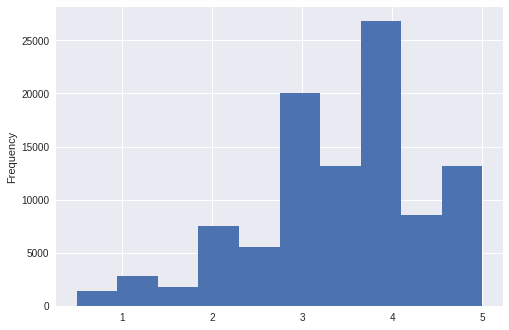

In [25]:
notas.notas.plot(kind='hist') #é a mesma coisa que notas['notas'] // hist = histograma = quantas vezes aparece cada nota

In [30]:
notas.notas.describe() #mostra várias informações do gráfico || 1/4 dos dados está abaixo de 3 || 1/2 dos dados estão abaixo de 3.5...

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: notas, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


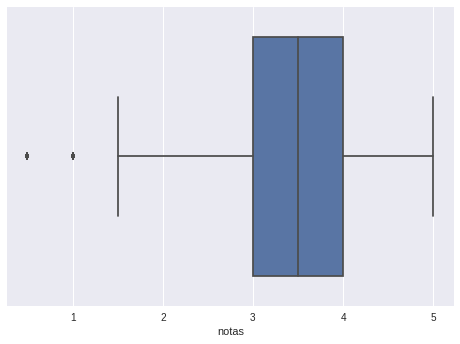

In [35]:
import seaborn as sns

sns.boxplot(notas.notas) #plota os dados acima

#Olhando os filmes

In [59]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmesId","titulo","genero"]
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#Analisando algumas notas específicas por filme

In [61]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmesId","titulo","genero"]
notas.query("filmesId==1").notas.mean() #query faz uma pergunta que eu quero fazer aos meus dados | média das notas do filme 1 == Toy Story

3.9209302325581397

In [66]:
medias_por_filme = notas.groupby("filmesId").mean().notas #devolve uma séria | média de notas por filme
medias_por_filme.head()

filmesId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: notas, dtype: float64

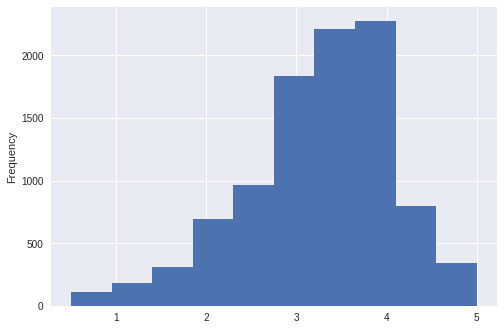

In [68]:
medias_por_filme.plot(kind="hist")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


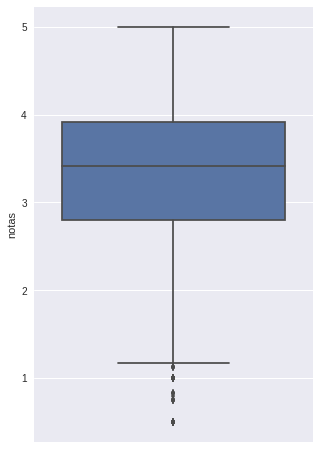

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme) #y= muda o eixo

In [74]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: notas, dtype: float64

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


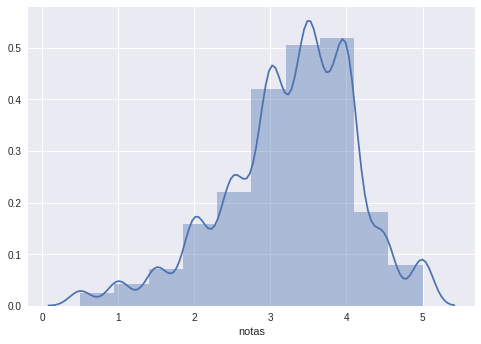

In [79]:
sns.distplot(medias_por_filme, bins = 10) #bins = quantidade de caixinhas

Text(0.5, 1.0, 'Histograma das médias dos filmes')

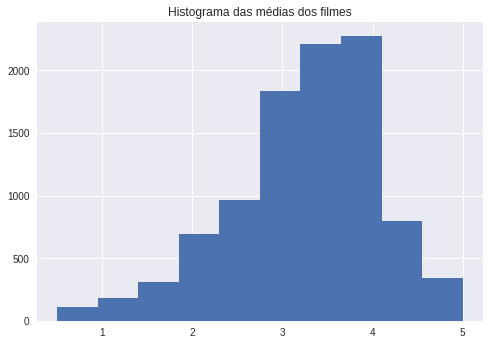

In [83]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")